# Analiza rezultatov tekmovanja iz logike

Tukaj bom analizirala rezultate tekmovanja iz logike, ki se nahajajo na spletni strani https://zotks.si/priznanja/logika/.

Za začetek si oglejmo vse rezultate - vse prejemnike zlatih priznanj v šolskih letih 2020/21 - 2023/24.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

rezultati = pd.read_csv('datoteka.csv')
rezultati.index = rezultati.index + 1
rezultati

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,1. letnik,Primož Markovič,Ana Grozdanić Pavlin,Gimnazija Bežigrad,68,1
2,1. letnik,Gal Fabjan,Savina Brcar,Gimnazija Bežigrad,66.5,2
3,1. letnik,Tine Šalamon,Valentina Herbaj,Gimnazija Murska Sobota,66,3
4,1. letnik,Ivan Tušek,Manca Čadež,Gimnazija Škofja Loka,64.5,4
5,1. letnik,Janoš Ivanec,Hanka Lebič,Gimnazija Vič,64,5
...,...,...,...,...,...,...
963,4. letnik,Kaja Grošelj,Milan Zeman,"Zavod sv. Stanislava za vzgojo, izobraževanje ...",46,17
964,4. letnik,Julija Brecelj,Milan Zeman,"Zavod sv. Stanislava za vzgojo, izobraževanje ...",46,17
965,4. letnik,Lana Prijon,Savina Brcar,Gimnazija Bežigrad,46,17
966,4. letnik,Sara Mihalič,Benjamin Tomažič,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",45.5,21


Ker je to precej nepregledno, bi si jih bilo bolj pametno ogledati po posameznih tekmovalnih skupinah. Oglejmo si najprej katere tekmovalne skupine sploh obstajajo, nato pa poglejmo začetnih nekaj mest za vsako skupino.

In [241]:
skupine = rezultati['Skupina'].unique()
razdeljeni_podatki = {skupina: rezultati[rezultati['Skupina'] == skupina] for skupina in skupine}

print(skupine)
print()

for skupina, data in razdeljeni_podatki.items():
    print(f"Podatki za {skupina}:")
    display(data.head())

['1. letnik' '2. letnik' '3. letnik' '4. letnik' '7. razred' '8. razred'
 '9. razred']

Podatki za 1. letnik:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
1,1. letnik,Primož Markovič,Ana Grozdanić Pavlin,Gimnazija Bežigrad,68.0,1,Gimnazija
2,1. letnik,Gal Fabjan,Savina Brcar,Gimnazija Bežigrad,66.5,2,Gimnazija
3,1. letnik,Tine Šalamon,Valentina Herbaj,Gimnazija Murska Sobota,66.0,3,Gimnazija
4,1. letnik,Ivan Tušek,Manca Čadež,Gimnazija Škofja Loka,64.5,4,Gimnazija
5,1. letnik,Janoš Ivanec,Hanka Lebič,Gimnazija Vič,64.0,5,Gimnazija


Podatki za 2. letnik:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
30,2. letnik,Katrina Žganec,Špela Tola,Gimnazija Bežigrad,68.0,1,Gimnazija
31,2. letnik,Florjana Benec,Jana Kete,Škofijska gimnazija Vipava,67.0,2,Gimnazija
32,2. letnik,Tadej Zelenc,Melita Prezelj,Gimnazija Jurija Vege Idrija,67.0,2,Gimnazija
33,2. letnik,Svit Miklavčič,Hanka Lebič,Gimnazija Vič,65.0,4,Gimnazija
34,2. letnik,Julija Golež,Saša Kelhar,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",64.0,5,Preostale


Podatki za 3. letnik:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
59,3. letnik,Sara Ferreira,Jaka Kavčič,Gimnazija Škofja Loka,65.0,1,Gimnazija
60,3. letnik,Maša Mežnar,Jana Mahnič Šterling,Gimnazija Koper,63.0,2,Gimnazija
61,3. letnik,Aleksander Kosanović,Janja Jakončič,Gimnazija Bežigrad,63.0,2,Gimnazija
62,3. letnik,Tjaša Novak,Mitja Bončina,Gimnazija in srednja šola Kočevje,63.0,2,Gimnazija
63,3. letnik,Aljaž Erman,Rok Škufca,Gimnazija Kranj,62.0,5,Gimnazija


Podatki za 4. letnik:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
88,4. letnik,Brest Lenarčič,Tatjana Cirer,Šolski center Rogaška Slatina,67.0,1,Preostale
89,4. letnik,Sofija Štefan,Irena Fabič Petrač,Gimnazija Koper,64.0,2,Gimnazija
90,4. letnik,Filip Zver,Natalija Horvat,Gimnazija Franca Miklošiča Ljutomer,63.0,3,Gimnazija
91,4. letnik,Žan Pustoslemšek,Simona Vreš,"Šolski center Ravne na Koroškem, Gimnazija Rav...",63.0,3,Gimnazija
92,4. letnik,Luka Urbanc,Urška Markun,Gimnazija Bežigrad,63.0,3,Gimnazija


Podatki za 7. razred:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
118,7. razred,Lovro Logar,Ana Nuša Rigler,Osnovna šola Primoža Trubarja Velike Lašče,68.5,1,Osnovna šola
119,7. razred,Anže Hvasti,Tihana Smolej,Osnovna šola Naklo,67.5,2,Osnovna šola
120,7. razred,Olivija Meta Šega,Teja Koprivc,Osnovna šola Valentina Vodnika,67.5,2,Osnovna šola
121,7. razred,Iza Džuzdanović,Marjanca Komar,Osnovna šola Franceta Prešerna Kranj,66.5,4,Osnovna šola
122,7. razred,Darija Kušej,Anja Smrtnik,"Osnovna šola Franceta Bevka, Ljubljana",66.5,4,Osnovna šola


Podatki za 8. razred:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
190,8. razred,Hana Zupančič,Kristina Kolbezen,Osnovna šola Vrhovci,54.5,1,Osnovna šola
191,8. razred,Taj Birk,Uroš Medar,Osnovna šola Danile Kumar,50.5,2,Osnovna šola
192,8. razred,Matic Pauman,Milena Čakš Karpov,Osnovna šola Antona Ingoliča Spodnja Polskava,50.5,2,Osnovna šola
193,8. razred,Žan Štefan Buh,Anja Šmid Pustoslemšek,Osnovna šola Orehek Kranj,50.0,4,Osnovna šola
194,8. razred,Lara Rodman,Tatjana Boscarol,Osnovna šola Milojke Štrukelj Nova Gorica,49.0,5,Osnovna šola


Podatki za 9. razred:


,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto,Tip šole
229,9. razred,Andraž Čadež,Nataša Šircelj,Osnovna šola Šmartno pod Šmarno goro,59.0,1,Osnovna šola
230,9. razred,Žan Mesarič,Nataša Jerebic,Osnovna šola Beltinci,53.0,2,Osnovna šola
231,9. razred,Rok Živec,Mojca Sosič,Osnovna šola Srečka Kosovela Sežana,51.5,3,Osnovna šola
232,9. razred,Tjaša Dobrečevič,Helena Kurent,Osnovna šola Prežihovega Voranca,51.0,4,Osnovna šola
233,9. razred,Zala Žlebir Kožuh,Tanja Lakner,Osnovna šola Leskovec pri Krškem,49.5,5,Osnovna šola


Za lažjo obdelavo podatkov vsako skupino shranimo v svojo csv datoteko.

In [227]:
for skupina, data in razdeljeni_podatki.items():
    ime_datoteke = f"podatki_{skupina.replace('.', '').replace(' ', '_').lower()}.csv"
    data.to_csv(ime_datoteke, index=False)

Zdaj lahko obravnavamo vsako skupino posebej. Ker sem podatke pobrala iz celotne spletne strani, so podatki za več šolskih let - obravnavala bom kar več let skupaj (torej bom ločila le glede na tekmovalno skupino). 

Da ne bo preveč ponavljanja, bom za večino stvari obravnavala le rezultate gimnazijcev (osnovno šolo bom torej izpustila).

In [24]:
rezultati_1_letnik = pd.read_csv('podatki_1_letnik.csv')
rezultati_1_letnik.index = rezultati_1_letnik.index + 1
rezultati_1_letnik

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,1. letnik,Primož Markovič,Ana Grozdanić Pavlin,Gimnazija Bežigrad,68.0,1
2,1. letnik,Gal Fabjan,Savina Brcar,Gimnazija Bežigrad,66.5,2
3,1. letnik,Tine Šalamon,Valentina Herbaj,Gimnazija Murska Sobota,66.0,3
4,1. letnik,Ivan Tušek,Manca Čadež,Gimnazija Škofja Loka,64.5,4
5,1. letnik,Janoš Ivanec,Hanka Lebič,Gimnazija Vič,64.0,5
...,...,...,...,...,...,...
95,1. letnik,Tinej Rajh,Vinko Medic,"Šolski center Novo mesto, Srednja elektro šola...",52.5,22
96,1. letnik,Lucija Vrbinc,Urška Ogrinc,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",52.0,25
97,1. letnik,Krištof Bučar,Urška Ogrinc,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",51.5,26
98,1. letnik,Matic Pogorelec,Vojko Brantuša,II. gimnazija Maribor,51.0,27


In [25]:
rezultati_2_letnik = pd.read_csv('podatki_2_letnik.csv')
rezultati_2_letnik.index = rezultati_2_letnik.index + 1
rezultati_2_letnik

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,2. letnik,Katrina Žganec,Špela Tola,Gimnazija Bežigrad,68.0,1
2,2. letnik,Florjana Benec,Jana Kete,Škofijska gimnazija Vipava,67.0,2
3,2. letnik,Tadej Zelenc,Melita Prezelj,Gimnazija Jurija Vege Idrija,67.0,2
4,2. letnik,Svit Miklavčič,Hanka Lebič,Gimnazija Vič,65.0,4
5,2. letnik,Julija Golež,Saša Kelhar,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",64.0,5
...,...,...,...,...,...,...
90,2. letnik,Klara Demšar,Tjaša Novak Lavriša,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",59.0,20
91,2. letnik,Tadej Vovk,Miha Šušteršič,Škofijska gimnazija Vipava,57.5,22
92,2. letnik,Nina Gerič,Tadeja Pucko,Gimnazija Murska Sobota,57.5,22
93,2. letnik,Val Pšeničnik,Tatjana Cirer,Šolski center Rogaška Slatina,57.0,24


In [26]:
rezultati_3_letnik = pd.read_csv('podatki_3_letnik.csv')
rezultati_3_letnik.index = rezultati_3_letnik.index + 1
rezultati_3_letnik

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,3. letnik,Sara Ferreira,Jaka Kavčič,Gimnazija Škofja Loka,65.0,1
2,3. letnik,Maša Mežnar,Jana Mahnič Šterling,Gimnazija Koper,63.0,2
3,3. letnik,Aleksander Kosanović,Janja Jakončič,Gimnazija Bežigrad,63.0,2
4,3. letnik,Tjaša Novak,Mitja Bončina,Gimnazija in srednja šola Kočevje,63.0,2
5,3. letnik,Aljaž Erman,Rok Škufca,Gimnazija Kranj,62.0,5
...,...,...,...,...,...,...
83,3. letnik,Patrik Potočnik,Eva Jug,Gimnazija Škofja Loka,44.5,11
84,3. letnik,Zara Kejžar,Helena Kapus,Gimnazija Kranj,44.0,12
85,3. letnik,Neo Mistral,Vilko Domajnko,Gimnazija Bežigrad,43.5,13
86,3. letnik,Maxim Cosovici,Romana Vrtačič,Gimnazija Vič,43.5,13


In [27]:
rezultati_4_letnik = pd.read_csv('podatki_4_letnik.csv')
rezultati_4_letnik.index = rezultati_4_letnik.index + 1
rezultati_4_letnik

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,4. letnik,Brest Lenarčič,Tatjana Cirer,Šolski center Rogaška Slatina,67.0,1
2,4. letnik,Sofija Štefan,Irena Fabič Petrač,Gimnazija Koper,64.0,2
3,4. letnik,Filip Zver,Natalija Horvat,Gimnazija Franca Miklošiča Ljutomer,63.0,3
4,4. letnik,Žan Pustoslemšek,Simona Vreš,"Šolski center Ravne na Koroškem, Gimnazija Rav...",63.0,3
5,4. letnik,Luka Urbanc,Urška Markun,Gimnazija Bežigrad,63.0,3
...,...,...,...,...,...,...
89,4. letnik,Kaja Grošelj,Milan Zeman,"Zavod sv. Stanislava za vzgojo, izobraževanje ...",46.0,17
90,4. letnik,Julija Brecelj,Milan Zeman,"Zavod sv. Stanislava za vzgojo, izobraževanje ...",46.0,17
91,4. letnik,Lana Prijon,Savina Brcar,Gimnazija Bežigrad,46.0,17
92,4. letnik,Sara Mihalič,Benjamin Tomažič,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",45.5,21


Rezultate 1. letnikov bom sedaj razvrstila padajoče glede na število točk. 

In [28]:
rezultati_po_tockah_1 = rezultati_1_letnik.sort_values('Točke', ascending=False)
rezultati_po_tockah_1

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
72,1. letnik,Val Bajc,Urška Ogrinc,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",71.0,1
73,1. letnik,Sofija Štefan,Danica Jereb,Gimnazija Koper,70.0,2
1,1. letnik,Primož Markovič,Ana Grozdanić Pavlin,Gimnazija Bežigrad,68.0,1
2,1. letnik,Gal Fabjan,Savina Brcar,Gimnazija Bežigrad,66.5,2
3,1. letnik,Tine Šalamon,Valentina Herbaj,Gimnazija Murska Sobota,66.0,3
...,...,...,...,...,...,...
67,1. letnik,Lara Stoilov Spasova,Mojca Lokar,Gimnazija Kranj,51.0,16
99,1. letnik,Maruša Gorkič,Elena Rudolf,Srednja ekonomska šola in gimnazija Maribor,51.0,27
69,1. letnik,Sara Ferreira,Manca Čadež,Gimnazija Škofja Loka,50.5,18
71,1. letnik,Žiga Vučajnk,Alojz Robnik,I. gimnazija v Celju,50.5,18


Podobno bi se dalo za vse letnike, vendar nam ta informacija ne pove veliko, poglejmo raje kakšno bolj zanimivo stvar.

Poglejmo zdaj povprečje točk po skupinah, zaokroženo na dve decimalki natančno.

In [251]:
rezultati[['Skupina','Točke']].groupby(by='Skupina').mean().round(2)

,Točke
Skupina,
1. letnik,57.86
2. letnik,60.70
3. letnik,52.94
4. letnik,54.84
7. razred,54.80
8. razred,50.01
9. razred,52.76


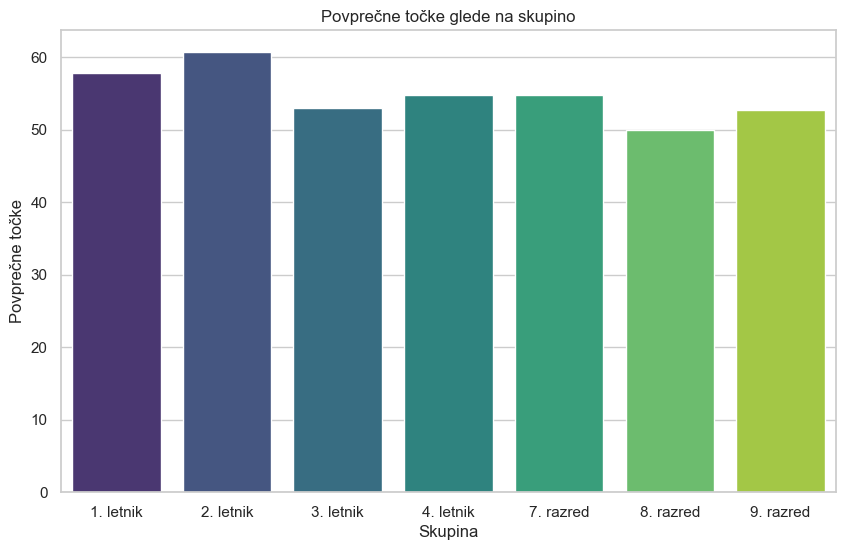

In [253]:
plt.figure(figsize=(10, 6))
seaborn.barplot(x='Skupina', y='Točke', data=rezultati, errorbar=None, hue='Skupina', palette='viridis', legend=False)
plt.ylabel('Povprečne točke')
plt.title('Povprečne točke glede na skupino')
plt.show()

Najdimo tekmovalce, ki so v svoji tekmovalni skupini dobili največ točk.

In [257]:
najvec_tock_1_letnik_indeks = rezultati_1_letnik['Točke'].idxmax()
najboljsi_tekmovalec_1_letnik = rezultati_1_letnik.loc[najvec_tock_1_letnik_indeks]
najboljsi_tekmovalec_1_letnik.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
72,1. letnik,Val Bajc,Urška Ogrinc,"Zavod sv. Frančiška Saleškega za vzgojo, izobr...",71.0,1


In [33]:
najvec_tock_2_letnik_indeks = rezultati_2_letnik['Točke'].idxmax()
najboljsi_tekmovalec_2_letnik = rezultati_2_letnik.loc[najvec_tock_2_letnik_indeks]
najboljsi_tekmovalec_2_letnik.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
70,2. letnik,Lenart Dolinar,Vilko Domajnko,Gimnazija Bežigrad,72.0,1


In [34]:
najvec_tock_3_letnik_indeks = rezultati_3_letnik['Točke'].idxmax()
najboljsi_tekmovalec_3_letnik = rezultati_3_letnik.loc[najvec_tock_3_letnik_indeks]
najboljsi_tekmovalec_3_letnik.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
30,3. letnik,Filip Zver,Natalija Horvat,Gimnazija Franca Miklošiča Ljutomer,70.0,1


In [40]:
najvec_tock_4_letnik_indeks = rezultati_4_letnik['Točke'].idxmax()
najboljsi_tekmovalec_4_letnik = rezultati_4_letnik.loc[najvec_tock_4_letnik_indeks]
najboljsi_tekmovalec_4_letnik.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
52,4. letnik,Rok Tadej Brunšek,Silvestra Jevšenak,"Šolski center Velenje, Gimnazija",70.0,1


Zdaj pa med vsemi tekmovalci najdimo dobitelja največ točk.

In [47]:
najvec_tock_vsi_indeks = rezultati['Točke'].idxmax()
najboljsi_tekmovalec_vsi = rezultati.loc[najvec_tock_vsi_indeks]
najboljsi_tekmovalec_vsi.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
622,8. razred,Lana Pirc,Klemen Kovačič,Osnovna šola Zbora odposlancev Kočevje,75.0,1


Poiščimo še tekmovalca z najmanj točkami med dobitelji zlatih priznanj.

In [48]:
najmanj_tock_vsi_indeks = rezultati['Točke'].idxmin()
najslabsi_tekmovalec_vsi = rezultati.loc[najmanj_tock_vsi_indeks]
najslabsi_tekmovalec_vsi.to_frame().T

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
226,8. razred,Luka Vincek,Maja Kušar,Osnovna šola Toneta Okrogarja,38.0,37


Moram poudariti, da se je ta tekmovalec vseeno odlično odrezal, saj je še zmeraj osvojil zlato priznanje.

O točkah smo povedali dovolj, poglejmo zdaj kako so se odrezali učenci/dijaki posameznih šol.
Ker sem sama hodila na Gimnazijo Bežigrad, me zanima število dobitnikov zlatih priznanj iz te šole.

In [49]:
bezigrad = rezultati[rezultati['Šola'].str.contains('Gimnazija Bežigrad')]
bezigrad

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
1,1. letnik,Primož Markovič,Ana Grozdanić Pavlin,Gimnazija Bežigrad,68.0,1
2,1. letnik,Gal Fabjan,Savina Brcar,Gimnazija Bežigrad,66.5,2
7,1. letnik,Dora Ivana Šega,Ana Grozdanić Pavlin,Gimnazija Bežigrad,63.0,7
10,1. letnik,Natan Vesnaver,Jasna Kos,Gimnazija Bežigrad,62.0,10
13,1. letnik,Veronika Stegel,Ana Grozdanić Pavlin,Gimnazija Bežigrad,59.0,13
...,...,...,...,...,...,...
945,3. letnik,Enej Lah,Urška Markun,Gimnazija Bežigrad,43.0,15
950,4. letnik,Žiga Kmecl,Urška Rihtaršič,Gimnazija Bežigrad,55.0,5
954,4. letnik,Jasmina Kajtazović,Bojana Dvoržak,Gimnazija Bežigrad,49.0,9
960,4. letnik,Lea Stražišar,Bojana Dvoržak,Gimnazija Bežigrad,46.5,14


In [165]:
stevilo_zlatih_bezi = bezigrad.shape[0]
stevilo_zlatih_bezi

70

Poglejmo zdaj, katera šola ima največ nagrajencev.

In [51]:
stevilo_nagrajencev_po_solah = rezultati.groupby('Šola').size()
stevilo_nagrajencev_po_solah.to_frame(name='Število nagrajencev').sort_values(by='Število nagrajencev', ascending=False)


,Število nagrajencev
Šola,
Gimnazija Bežigrad,70
Gimnazija Vič,28
II. gimnazija Maribor,26
Gimnazija Kranj,24
Gimnazija Škofja Loka,19
...,...
Osnovna šola Simona Jenka,1
Osnovna šola Simona Gregorčiča Kobarid,1
Osnovna šola Sečovlje,1


In [266]:
stevilo_nagrajencev_po_solah.to_frame(name='Število nagrajencev').sort_values(by='Število nagrajencev', ascending=False).head(1)


,Število nagrajencev
Šola,
Gimnazija Bežigrad,70


Opazimo, da ima Gimnazija Bežigrad največ (70) nagrajencev. Počasi ji sledi Gimnazija Vič z 28 nagrajenci.

Poglejmo, kakšno je povprečno število nagrajencev za tiste šole, ki imajo >= 10 nagrajencev in katere šole so to.

In [85]:
sola_z_vec_kot_10_nagrajenci = stevilo_nagrajencev_po_solah[stevilo_nagrajencev_po_solah >= 10]
sola_z_vec_kot_10_nagrajenci.to_frame(name='Število nagrajencev').sort_values(by='Število nagrajencev', ascending=False)

,Število nagrajencev
Šola,
Gimnazija Bežigrad,70
Gimnazija Vič,28
II. gimnazija Maribor,26
Gimnazija Kranj,24
Gimnazija Škofja Loka,19
"Zavod sv. Frančiška Saleškega za vzgojo, izobraževanje in kulturne dejavnosti",16
Gimnazija Koper,14
Osnovna šola Milana Šuštaršiča,11
Osnovna šola Škofljica,11


In [87]:
povprecno_stevilo_nagrajencev_za_velike_sole = sola_z_vec_kot_10_nagrajenci.mean()
round(povprecno_stevilo_nagrajencev_za_velike_sole)

20

Zanima me, če se kje pojavi OŠ, ki sem jo obiskovala - Osnovna šola Primoža Trubarja Velike Lašče.

In [64]:
osptvl = rezultati[rezultati['Šola'].str.contains('Osnovna šola Primoža Trubarja Velike Lašče')]
osptvl

,Skupina,Tekmovalec,Mentor,Šola,Točke,Mesto
118,7. razred,Lovro Logar,Ana Nuša Rigler,Osnovna šola Primoža Trubarja Velike Lašče,68.5,1


Poglejmo si, kateri mentor se največkrat pojavi.

In [267]:
stevilo_po_mentorjih = rezultati[['Mentor','Šola']].value_counts()
stevilo_po_mentorjih.to_frame(name='Število nagrajencev').sort_values(by='Število nagrajencev', ascending=False)

,,Število nagrajencev
Mentor,Šola,
Vojko Brantuša,II. gimnazija Maribor,26
Urška Markun,Gimnazija Bežigrad,19
Manca Čadež,Gimnazija Škofja Loka,13
Milan Zeman,"Zavod sv. Stanislava, Škofijska klasična gimnazija",11
Silvestra Jevšenak,"Šolski center Velenje, Gimnazija",10
...,...,...
Tina Cotič,Osnovna šola Solkan,1
Mateja Alič,Osnovna šola F. S. Finžgarja Lesce,1
Nataša Taleski Gržinić,Osnovna šola Trnovo,1


Kot vidimo iz zgornje tabele, se največkrat pojavi mentor Vojko Brantuša, izpišimo ga skupaj s številom nagrajencev, katerih mentor je bil.

In [268]:
stevilo_po_mentorjih.to_frame(name='Število nagrajencev').sort_values(by='Število nagrajencev', ascending=False).head(1)

,,Število nagrajencev
Mentor,Šola,
Vojko Brantuša,II. gimnazija Maribor,26


Zdaj pa nas zanima še, kateri tekmovalec se največkrat pojavi in kolikokrat.

In [68]:
stevilo_po_tekmovalcih = rezultati['Tekmovalec'].value_counts()
stevilo_po_tekmovalcih.to_frame(name='Število zlatih priznanj').sort_values(by='Število zlatih priznanj', ascending=False)

,Število zlatih priznanj
Tekmovalec,
Filip Zver,4
Tjaša Novak,4
Tine Šalamon,4
Sara Ferreira,4
Zarja Mahnič,4
...,...
Samo Bobnar,1
Filip Bratovič,1
Taja Šebenik,1


Kot vidimo, je veliko tekmovalcev dobilo kar po 4 zlata priznanja. Poglejmo koliko je takih tekmovalcev.

In [70]:
tekmovalci_s_4_priznanji = stevilo_po_tekmovalcih[stevilo_po_tekmovalcih == 4]
stevilo_tekmovalcev_s_4_priznanji = tekmovalci_s_4_priznanji.shape[0]
stevilo_tekmovalcev_s_4_priznanji

10

Poiščimo še imena teh tekmovalcev.

In [89]:
tekmovalci_s_4_priznanji = stevilo_po_tekmovalcih[stevilo_po_tekmovalcih == 4]
tekmovalci_s_4_priznanji.to_frame(name='Število zlatih priznanj').sort_values(by='Število zlatih priznanj', ascending=False)

,Število zlatih priznanj
Tekmovalec,
Filip Zver,4
Tine Šalamon,4
Ivan Tušek,4
Tomaž Holc,4
Petra Zadravec,4
David Ahec,4
Tjaša Novak,4
Zarja Mahnič,4
Sofija Štefan,4


Poglejmo si, koliko tekmovalcev je bilo uvrščenih na posamezno mesto, potem pa še katero mesto je bilo največkrat doseženo.

In [81]:
stevilo_tekmovalcev_po_mestih = rezultati['Mesto'].value_counts()
stevilo_tekmovalcev_po_mestih.to_frame(name='Število tekmovalcev').sort_values(by='Število tekmovalcev', ascending=False)

,Število tekmovalcev
Mesto,
18,44
5,38
14,38
1,36
13,36
10,31
11,31
6,30
2,29


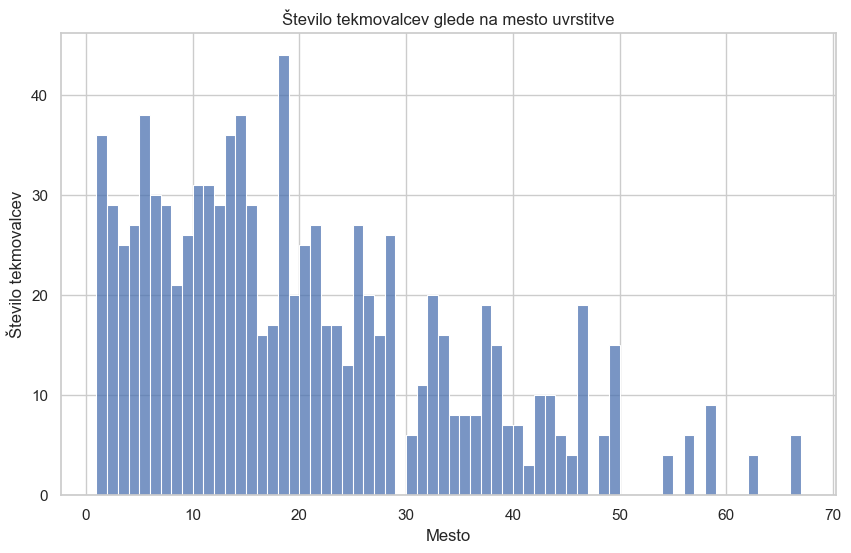

In [223]:
plt.figure(figsize=(10, 6))
seaborn.histplot(rezultati, x="Mesto", binwidth=1)
plt.ylabel("Število tekmovalcev")
plt.title('Število tekmovalcev glede na mesto uvrstitve')
plt.show()

In [269]:
stevilo_tekmovalcev_po_mestih.to_frame(name='Število tekmovalcev').sort_values(by='Število tekmovalcev', ascending=False).head(1)

,Število tekmovalcev
Mesto,
18,44


Rezultat je presenetljiv, saj je bilo največkrat doseženo 18. mesto - pričakovali bi, da bi bilo 1., 2. ali 3. mesto.

Preden se lotimo grafov, poglejmo še, katero je zadnje mesto, ki je še dobilo zlato priznanje.

In [79]:
najvecje_mesto = rezultati['Mesto'].max()
najvecje_mesto

67

Zdaj pa se lotimo grafov, za boljšo predstavo naših podatkov. 
Najprej si poglejmo, če izobrazba (osnovna/srednja šola/gimnazija) vpliva na število dobitnikov zlatih priznanj.

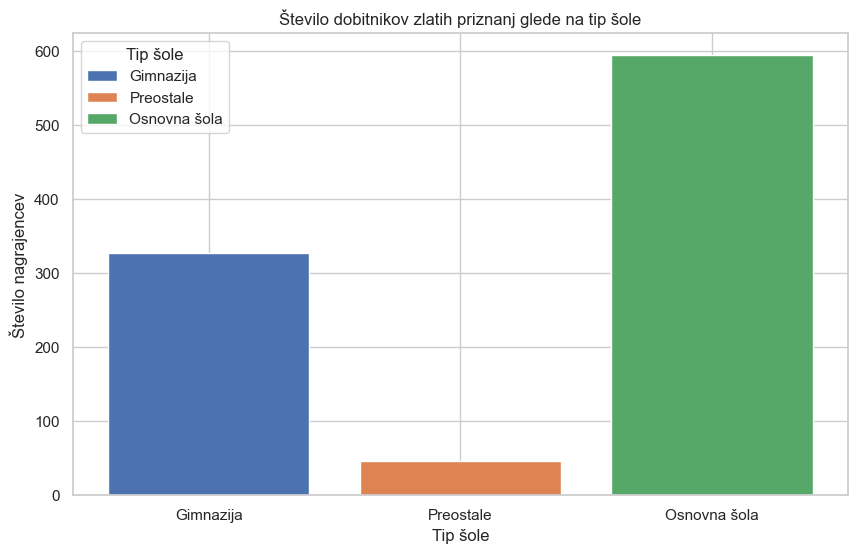

In [277]:
def doloci_tip_sole(sola):
    if 'gimnazija' in sola.lower():
        return 'Gimnazija'
    elif 'osnovna šola' in sola.lower():
        return 'Osnovna šola'
    else:
        return 'Preostale'

rezultati['Tip šole'] = rezultati['Šola'].apply(doloci_tip_sole)

plt.figure(figsize=(10, 6))
seaborn.histplot(rezultati, x='Tip šole', hue='Tip šole', shrink=.8, alpha=1)
plt.ylabel("Število nagrajencev")
plt.title("Število dobitnikov zlatih priznanj glede na tip šole")
plt.show()

Kot vidimo, je daleč največ tekmovalcev iz osnovnih šol, torej tu izobrazba ne igra ključne vloge. Res pa je, da je veliko več tekmovalcev iz gimnazij, kot pa iz srednjih, strokovnih šol ipd.

Poglejmo si graf, ki nam bo pokazal število točk, ki so jih dosegli tekmovalci iz gimnazij oz. preostalih šol in poglejmo, kateri tip šole je povprečju boljši.

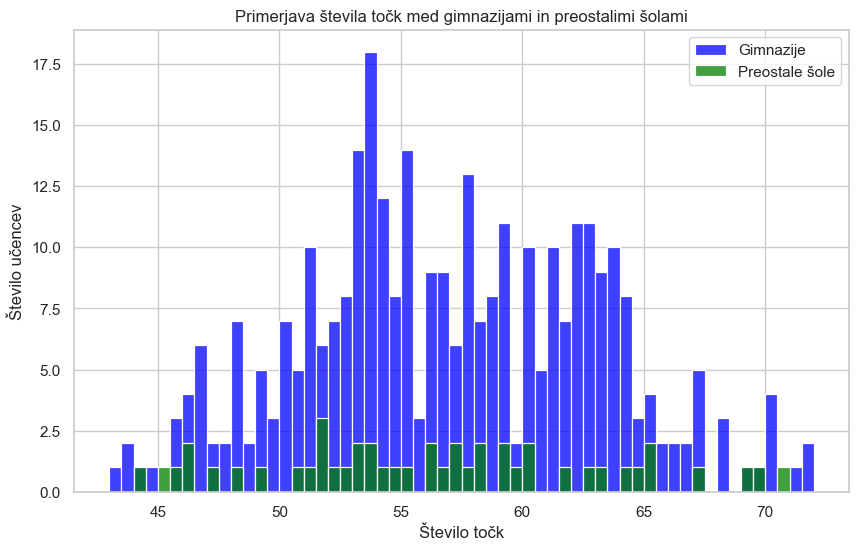

In [176]:
gimnazije = rezultati[rezultati['Šola'].str.contains('Gimnazija', case=False)]
preostale_sole = rezultati[~rezultati['Šola'].str.contains('Gimnazija|Osnovna šola', case=False)]

plt.figure(figsize=(10, 6))
seaborn.histplot(gimnazije['Točke'], color='blue', label='Gimnazije', binwidth=0.5)
seaborn.histplot(preostale_sole['Točke'], color='green', label='Preostale šole', binwidth=0.5)
plt.xlabel('Število točk')
plt.ylabel('Število učencev')
plt.title('Primerjava števila točk med gimnazijami in preostalimi šolami')
plt.legend()
plt.show()

Za isto stvar si poglejmo še razpršen graf. 

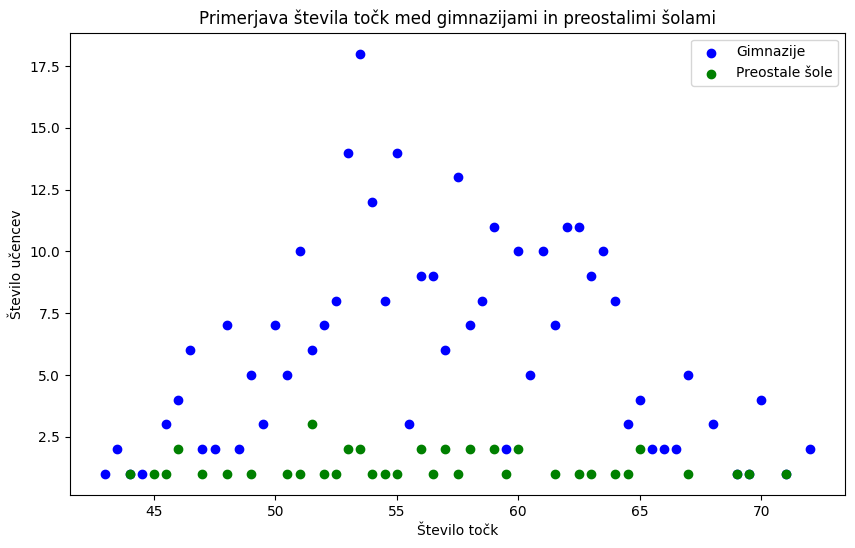

In [144]:
gimnazije_count = gimnazije['Točke'].value_counts().reset_index()
gimnazije_count.columns = ['Točke', 'Število učencev']

preostale_sole_count = preostale_sole['Točke'].value_counts().reset_index()
preostale_sole_count.columns = ['Točke', 'Število učencev']

plt.figure(figsize=(10, 6))
plt.scatter(gimnazije_count['Točke'], gimnazije_count['Število učencev'], color='blue', label='Gimnazije')
plt.scatter(preostale_sole_count['Točke'], preostale_sole_count['Število učencev'], color='green', label='Preostale šole')
plt.xlabel('Število točk')
plt.ylabel('Število učencev')
plt.title('Primerjava števila točk med gimnazijami in preostalimi šolami')
plt.legend()
plt.show()

Oglejmo si še, kako so se tekmovalci uvrstili glede na število prejetih točk.

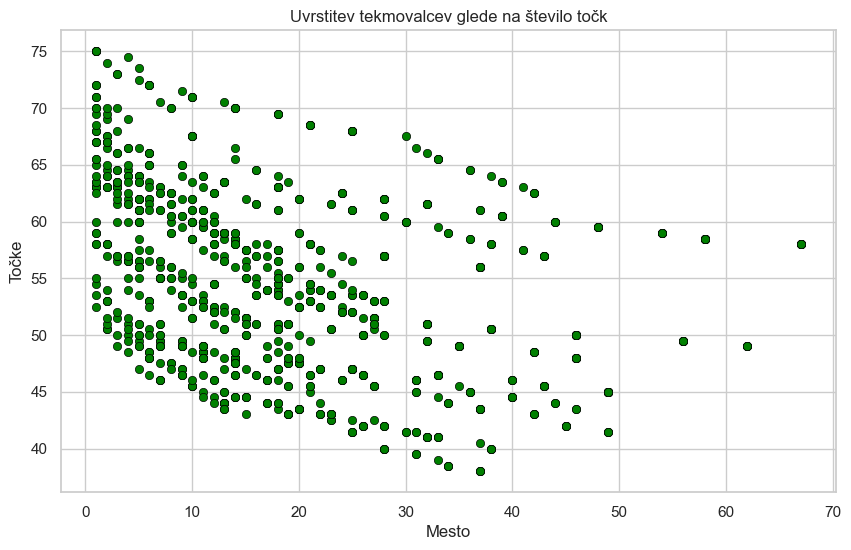

In [207]:
plt.figure(figsize=(10, 6))
seaborn.scatterplot(rezultati, x='Mesto', y='Točke', color='green', edgecolor='black')
plt.xlabel('Mesto')
plt.ylabel('Točke')
plt.title('Uvrstitev tekmovalcev glede na število točk')
plt.show()

Poglejmo isti graf še za skupine, saj je tako lažje berljiv.

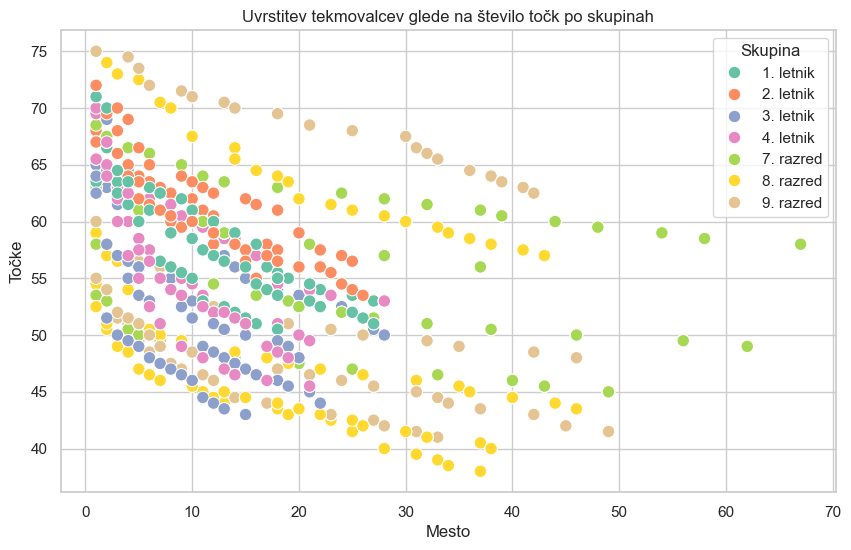

In [208]:
plt.figure(figsize=(10, 6))
seaborn.scatterplot(x='Mesto', y='Točke', hue='Skupina', data=rezultati, palette='Set2', s=80)
plt.xlabel('Mesto')
plt.ylabel('Točke')
plt.title('Uvrstitev tekmovalcev glede na število točk po skupinah')
plt.legend(title='Skupina')
plt.show()